# Описание проекта

### Введение

**План**


1) Провести первичный анализ данных, ознакомиться с датафреймом, посмотреть на пропуски, дубликаты, некорректные значения;

2) Провести исследовательский анализ данных:

    - Количество выпусков игр в разные годы;
    - Ознакомиться с имзенением продаж по платформам;
    - Построить графики;
    - Сделать выводы.
    
3) Построить портерт пользователя, сделать сегментацию по регионам. 

4) Сформулировать гипотезы и проверить гипотезы:

    - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
    - Средние пользовательские рейтинги жанров Action и Sports разные.

5) Сделать выводы.

**Основная задача:** в данном проекте требуется выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. В распоряжении есть данные до 2016-го года.

### Подготовка данных 

Импортируем библиотеки

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import seaborn

In [2]:
data = pd.read_csv('/datasets/games.csv')

In [3]:
data.head(15)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Видим, что названия колонок в датфрейме начинаются с верхнего регистра. Также приведём к нижнему регистру данные в датафрейме.

In [4]:
data.columns = data.columns.str.lower()

In [5]:
list_of_column_names = ['name','platform','genre','rating']
for column in list_of_column_names:
    data[column] = data[column].str.lower()

В столбце *user_score* есть значения  "tbd" - будет определено. Можно заменить на NaN.

In [6]:
data['user_score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
0.7       2
1.1       2
0.6       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

In [7]:
data.loc[data['user_score'] =='tbd','user_score'] = np.nan
data['user_score'] = data['user_score'].astype('float')

Проверим количество пропусков в столбце *critic_score*.

In [8]:
data['critic_score'].isna().sum()

8578

Изучем нулевые значения в столбце *name*.

In [9]:
data[data['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,gen,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,gen,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Удалим данные строчки, так как информации в них почти нет.

In [10]:
data = data.dropna(subset = ['name'])

In [11]:
data[data['year_of_release'].isnull()].head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,madden nfl 2004,ps2,NaN,sports,4.26,0.26,0.01,0.71,94.0,8.5,e
377,fifa soccer 2004,ps2,NaN,sports,0.59,2.36,0.04,0.51,84.0,6.4,e
456,lego batman: the videogame,wii,NaN,action,1.80,0.97,0.00,0.29,74.0,7.9,e10+
475,wwe smackdown vs. raw 2006,ps2,NaN,fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,space invaders,2600,NaN,shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
627,rock band,x360,NaN,misc,1.93,0.33,0.00,0.21,92.0,8.2,t
657,frogger's adventures: temple of the frog,gba,NaN,adventure,2.15,0.18,0.00,0.07,73.0,NaN,e
678,lego indiana jones: the original adventures,wii,NaN,action,1.51,0.61,0.00,0.21,78.0,6.6,e10+
719,call of duty 3,wii,NaN,shooter,1.17,0.84,0.00,0.23,69.0,6.7,t
805,rock band,wii,NaN,misc,1.33,0.56,0.00,0.20,80.0,6.3,t


Так как количество небольшое, то смело можем проделать те же операции, что и с *user_score*.

In [12]:
data = data.dropna(subset = ['year_of_release'])

In [13]:
data[data['critic_score'].isnull()].head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,tetris,gb,1989.0,puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,duck hunt,nes,1984.0,shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,nintendogs,ds,2005.0,simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
12,pokemon gold/pokemon silver,gb,1999.0,role-playing,9.00,6.18,7.20,0.71,NaN,NaN,NaN
18,super mario world,snes,1990.0,platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN
20,pokemon diamond/pokemon pearl,ds,2006.0,role-playing,6.38,4.46,6.04,1.36,NaN,NaN,NaN
21,super mario land,gb,1989.0,platform,10.83,2.71,4.18,0.42,NaN,NaN,NaN
22,super mario bros. 3,nes,1988.0,platform,9.54,3.44,3.84,0.46,NaN,NaN,NaN


Создадим сводную таблицу, в которой будет указана медианная оценка пользователей и критиков по каждому жанру.

In [14]:
genre_pivot_table = data.pivot_table(index = 'genre', values = ["critic_score","user_score"], aggfunc = ['median'])
genre_pivot_table.columns = ['critic_score','user_score']
genre_pivot_table

,critic_score,user_score
genre,,
action,68.0,7.4
adventure,66.0,7.6
fighting,72.0,7.6
misc,69.0,7.1
platform,69.5,7.7
puzzle,70.0,7.5
racing,69.0,7.4
role-playing,74.0,7.8
shooter,73.0,7.4


Также следует заменить пропуски в столбце *rating* на значение "rp" - рейтинг ожидается.

In [15]:
data.loc[data.loc[:,'rating'].isnull(),'rating'] = 'rp'

Проверим весь датафрейм на наличие дубликатов.

In [16]:
data.duplicated().sum()

0

Далее требуется создать отдельный столбец с общими продажами.

In [17]:
data['total_sales'] = data.apply(lambda row: sum(row[['na_sales','eu_sales','jp_sales','other_sales']]),axis =1)

In [18]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
year_of_release,16444.0,2006.486256,5.875525,1980.0,2003.00,2007.00,2010.00,2016.00
na_sales,16444.0,0.264012,0.818378,0.0,0.00,0.08,0.24,41.36
eu_sales,16444.0,0.145930,0.506716,0.0,0.00,0.02,0.11,28.96
jp_sales,16444.0,0.078487,0.311100,0.0,0.00,0.00,0.04,10.22
other_sales,16444.0,0.047594,0.188005,0.0,0.00,0.01,0.03,10.57
critic_score,7983.0,68.994363,13.920060,13.0,60.00,71.00,79.00,98.00
user_score,7463.0,7.126330,1.499447,0.0,6.40,7.50,8.20,9.70
total_sales,16444.0,0.536023,1.558786,0.0,0.06,0.17,0.47,82.54


In [19]:
# Посмотрим, что у нас осталось
temp = data.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().sum()/len(temp)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: float64(8), object(4)
memory usage: 1.6+ MB
None
-------------------------
name [' beyblade burst' ' fire emblem fates' " frozen: olaf's quest" ...
 'zwei!!' 'zyuden sentai kyoryuger: game de gaburincho!!'
 '¡shin chan flipa en colores!']


**Вывод:** большое количество пропусков в столбцах *user_score* и *critic_score*, скорее всего, это связано с тем, что люди просто не ставили оценки продуктам, поэтому, можно заменить значения tbd в столбце *user_score* на NaN, так как эквивалентно отстутствии оценки. Пропуски с рейтингом связаны с тем, что играм выпущенным до создания ESRB не всем присваивался рейтинг.

### Исследовательский анализ данных

In [20]:
years_groupby = data.groupby('year_of_release').agg({'name':'count'})

Text(0, 0.5, 'Количество продаж')

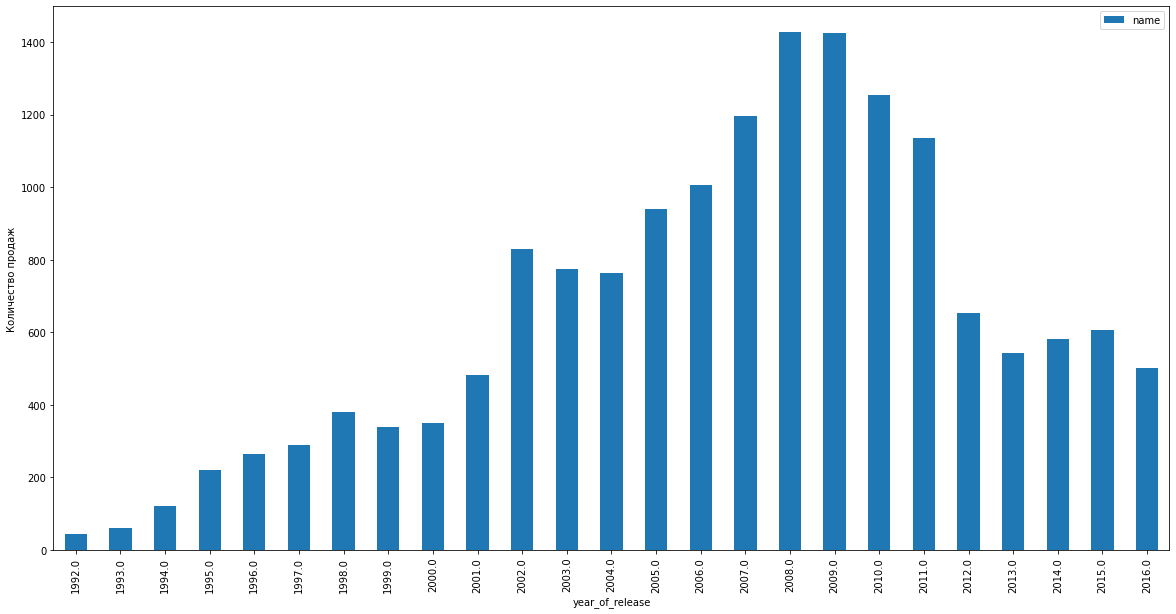

In [21]:
years_groupby.loc[1992:].plot(y = 'name', kind= 'bar', figsize = (20,10))
plt.ylabel('Количество продаж')

Пик выпуска игр приходится на 2008 и 2009 годы. С 2005 под 2011 было выпущено наибольшее количество игр.

Выведем топ-10 популярных платформ.

In [22]:
top_ten_platforms = data.groupby('platform').agg({'total_sales':'sum'}).sort_values(by = 'total_sales', ascending = False)[:10].index

In [23]:
platform_pivot_table_years = data.pivot_table(index=['platform','year_of_release'], values = 'total_sales', aggfunc = 'sum')

In [24]:
platform_pivot_table_years['years'] =  platform_pivot_table_years.index
platform_pivot_table_years['years'] = platform_pivot_table_years['years'].apply (lambda row: row[1]).astype('int')

In [25]:
platform_pivot_table_years

total_sales  years
platform year_of_release                    
2600     1980.0                 11.38   1980
         1981.0                 35.68   1981
         1982.0                 28.88   1982
         1983.0                  5.84   1983
         1984.0                  0.27   1984
...                               ...    ...
xb       2008.0                  0.18   2008
xone     2013.0                 18.96   2013
         2014.0                 54.07   2014
         2015.0                 60.14   2015
         2016.0                 26.15   2016

[238 rows x 2 columns]

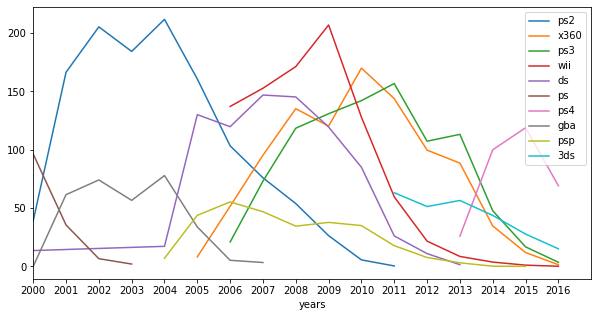

In [26]:
fig, ax = plt.subplots(figsize =(10,5))
for platform in top_ten_platforms:
    platform_pivot_table_years.loc[platform].plot('years','total_sales', ax=ax)
ax.legend(top_ten_platforms, prop = {'size':10})
ax.set_xlim([2000,2017])
ax.set_xticks(np.arange(2000,2017))
ax.set_xticklabels(range(2000,2017))
plt.show()

Самый актуальный период является период с 2013 до 2016 года. Средняя продолжительность платформы: 10-11 лет.

Выделим актуальный период.

In [27]:
period = (2013, 2016)
actual_data = data.query('@period[0] <= year_of_release <= @period[1]') 

In [28]:
actual_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,grand theft auto v,ps3,2013.0,action,7.02,9.09,0.98,3.96,97.0,8.2,m,21.05
23,grand theft auto v,x360,2013.0,action,9.66,5.14,0.06,1.41,97.0,8.1,m,16.27
31,call of duty: black ops 3,ps4,2015.0,shooter,6.03,5.86,0.36,2.38,NaN,NaN,rp,14.63
33,pokemon x/pokemon y,3ds,2013.0,role-playing,5.28,4.19,4.35,0.78,NaN,NaN,rp,14.60
42,grand theft auto v,ps4,2014.0,action,3.96,6.31,0.38,1.97,97.0,8.3,m,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,strawberry nauts,psv,2016.0,adventure,0.00,0.00,0.01,0.00,NaN,NaN,rp,0.01
16707,aiyoku no eustia,psv,2014.0,misc,0.00,0.00,0.01,0.00,NaN,NaN,rp,0.01
16710,samurai warriors: sanada maru,ps3,2016.0,action,0.00,0.00,0.01,0.00,NaN,NaN,rp,0.01
16712,haitaka no psychedelica,psv,2016.0,adventure,0.00,0.00,0.01,0.00,NaN,NaN,rp,0.01


In [29]:
pd.set_option('chained_assignment', None)
actual_data.loc[:, 'year_of_release'] = actual_data.loc[:, 'year_of_release'].astype('int')

In [30]:
actual_data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,grand theft auto v,ps3,2013,action,7.02,9.09,0.98,3.96,97.0,8.2,m,21.05
23,grand theft auto v,x360,2013,action,9.66,5.14,0.06,1.41,97.0,8.1,m,16.27
31,call of duty: black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,NaN,NaN,rp,14.63
33,pokemon x/pokemon y,3ds,2013,role-playing,5.28,4.19,4.35,0.78,NaN,NaN,rp,14.60
42,grand theft auto v,ps4,2014,action,3.96,6.31,0.38,1.97,97.0,8.3,m,12.62
47,pokemon omega ruby/pokemon alpha sapphire,3ds,2014,role-playing,4.35,3.49,3.10,0.74,NaN,NaN,rp,11.68
60,call of duty: ghosts,x360,2013,shooter,6.73,2.56,0.04,0.91,73.0,2.6,m,10.24
69,call of duty: ghosts,ps3,2013,shooter,4.10,3.63,0.38,1.25,71.0,2.6,m,9.36
72,minecraft,x360,2013,misc,5.70,2.65,0.02,0.81,NaN,NaN,rp,9.18
77,fifa 16,ps4,2015,sports,1.12,6.12,0.06,1.28,82.0,4.3,e,8.58


In [31]:
actual_data_pivot_table = actual_data.pivot_table(index = ['year_of_release','platform'], 
                                                    values = 'total_sales',
                                                    aggfunc = 'sum')

In [32]:
pivot_table_index = actual_data_pivot_table.index.to_list()

In [33]:
actual_data_pivot_table["years"] = [year for year, platform in pivot_table_index]

In [34]:
actual_data_pivot_table.index = [platform for year, platform in pivot_table_index]

In [35]:
actual_data_pivot_table

,total_sales,years
3ds,56.57,2013
ds,1.54,2013
pc,12.38,2013
ps3,113.25,2013
ps4,25.99,2013
psp,3.14,2013
psv,10.59,2013
wii,8.59,2013
wiiu,21.65,2013
x360,88.58,2013


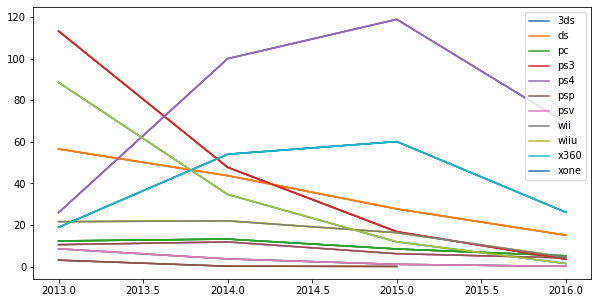

In [36]:
fig, ax = plt.subplots(figsize =(10,5))
for platform in actual_data_pivot_table.index:
    ax.plot(actual_data_pivot_table.loc[platform]['years'],
            actual_data_pivot_table.loc[platform]['total_sales'])
ax.legend(actual_data_pivot_table.index.unique(),prop = {'size':10})
plt.show()

По данным графика видим тенденцию к снижению по показателю продаж. PS3 и PS4, в отличие от остальных на первой половине периода растут, но затем снижаются. Скорее всего, это связано с выходом консоли PS4 PRO версии. Прибыльными могут стать продукты: wiiu, pc, xone.

Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

In [37]:
def boxplot_draw(title=None, query_condition = None, ylims=None):
    %matplotlib inline
    if query_condition == None:
        ax = actual_data.boxplot(column='total_sales', fontsize=25, figsize=(25,10))
    else:
        df_query = actual_data.query(query_condition)
        by_column = query_condition.split()[0]
        ax = df_query.boxplot(column='total_sales', by=by_column, fontsize=25, figsize=(25,10))
        ax.set_xlabel('')
        ax.set_title('')
    if ylims != None:
        ax.set_ylim(ylims)
    if title != None:
        plt.suptitle(title, y=0.94, fontsize=25, fontweight='bold')

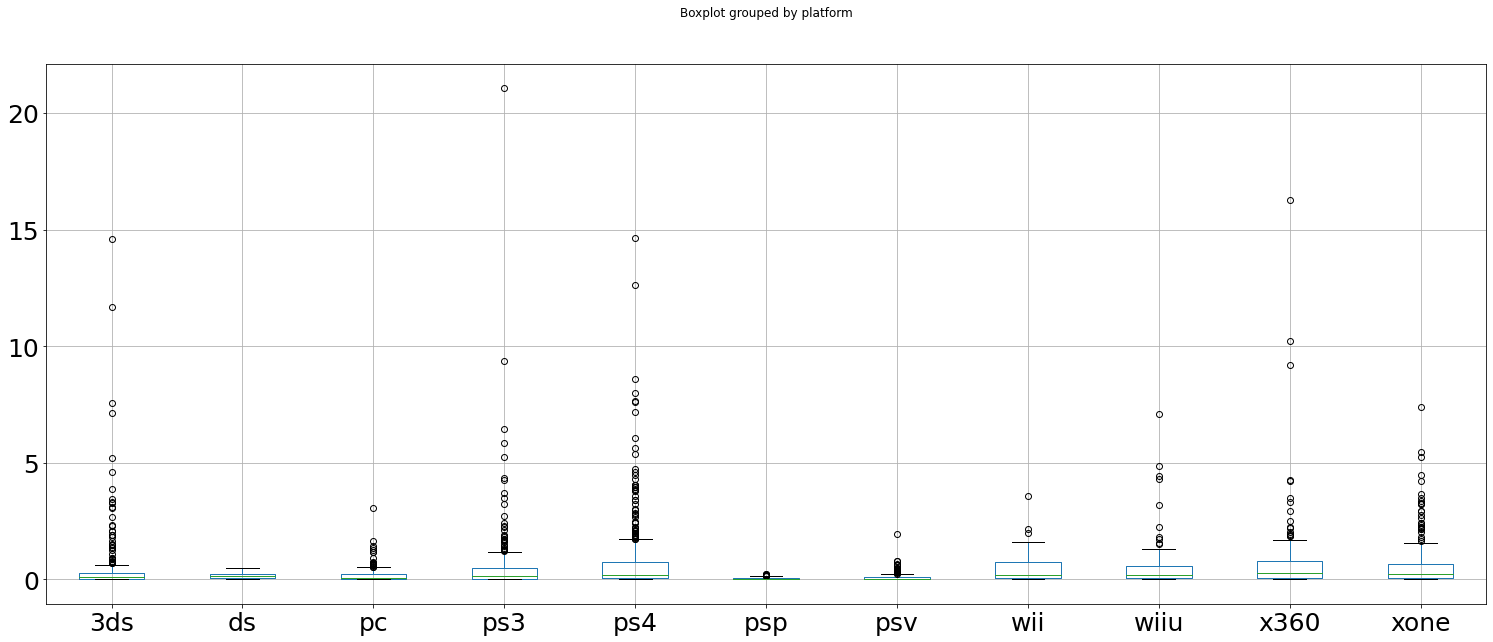

In [38]:
platforms = ['ps4', 'psv', 'ps3', '3ds', 'xone', 'pc', 'x360', 'wiiu', 'psp', 'wii', 'ds']
boxplot_draw(query_condition='platform in @platforms')

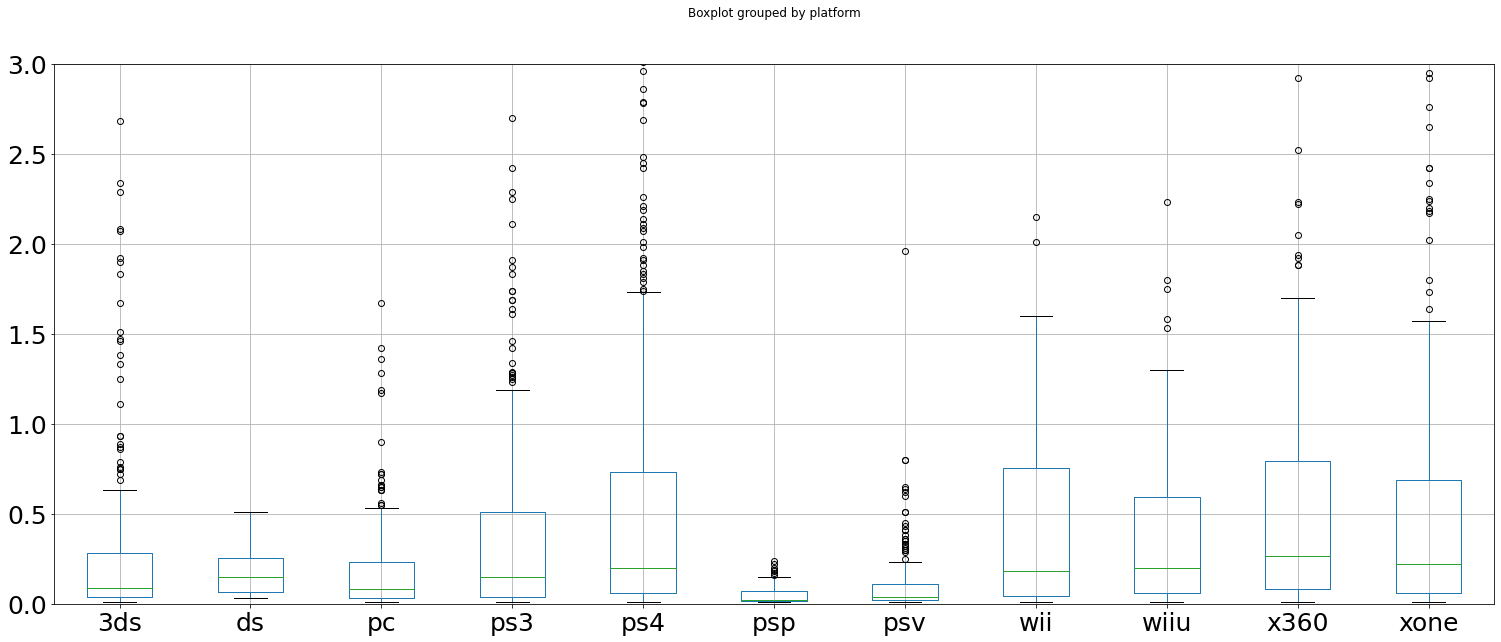

In [39]:
boxplot_draw(query_condition='platform in @platforms', ylims=[0, 3])

**Результат:** построил диаграммы размаха (по глобальныи продажам - по заданию) и по актуальному периоду (для справки). Что мы имеем: продажи за акутальный период имеют край верхней границы меньше, чем в глобальном - 0.9 млн. долларов. Медиана 0.2-0.25 млн. долларов. 

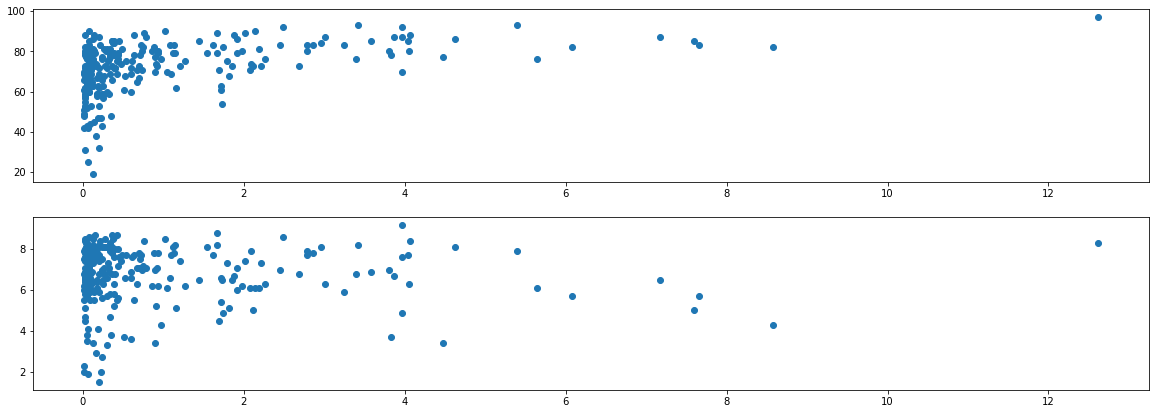

In [41]:
fig_scatter, (ax,ax2) = plt.subplots(2,1, figsize = (20,7))
ax.scatter(y= 'critic_score', x = 'total_sales',data=actual_data.query('platform == "ps4"').dropna())
ax2.scatter(y= 'user_score', x = 'total_sales',data=actual_data.query('platform == "ps4"').dropna())

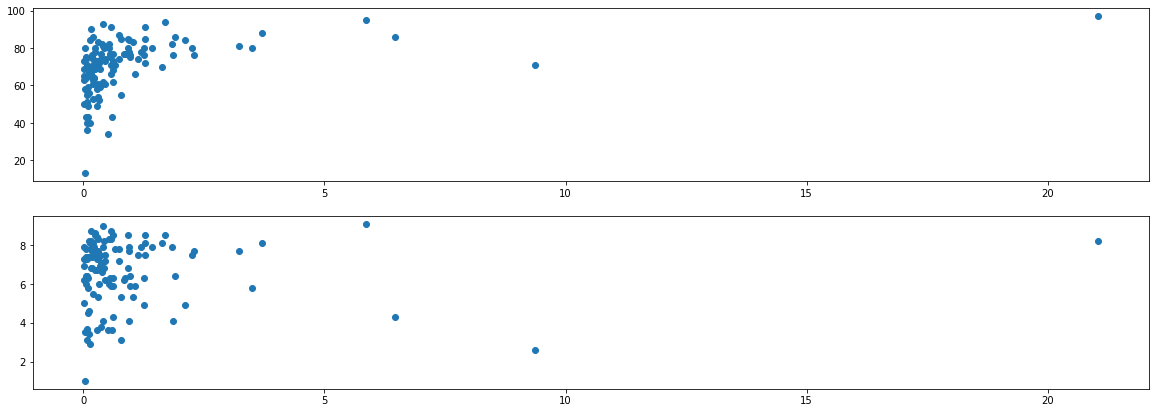

In [42]:
fig_scatter, (ax3,ax4) = plt.subplots(2,1, figsize = (20,7))
ax3.scatter(y= 'critic_score', x = 'total_sales',data=actual_data.query('platform == "ps3"').dropna())
ax4.scatter(y= 'user_score', x = 'total_sales',data=actual_data.query('platform == "ps3"').dropna())

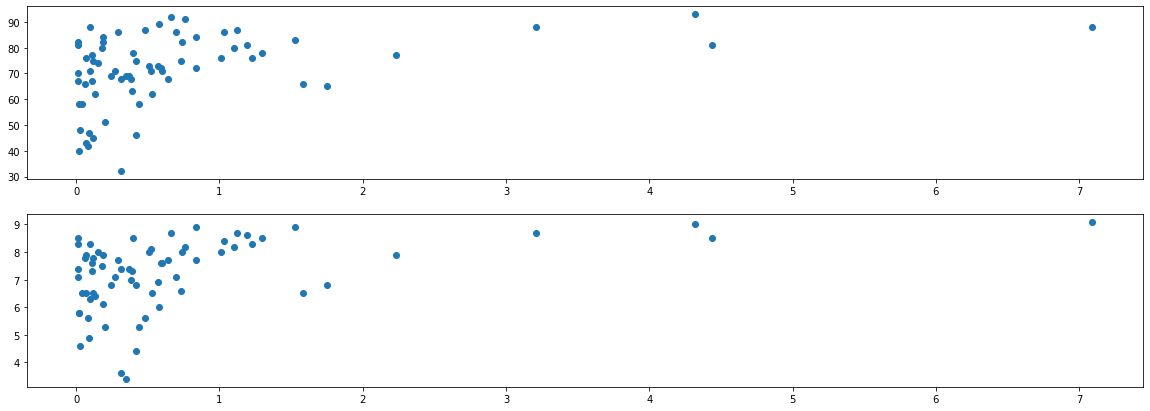

In [43]:
fig_scatter, (ax5,ax6) = plt.subplots(2,1, figsize = (20,7))
ax5.scatter(y= 'critic_score', x = 'total_sales',data=actual_data.query('platform == "wiiu"').dropna())
ax6.scatter(y= 'user_score', x = 'total_sales',data=actual_data.query('platform == "wiiu"').dropna())

In [44]:
ps4_critic_score = actual_data.query('platform == "ps4"')['critic_score']
ps4_user_score = actual_data.query('platform == "ps4"')['user_score']
ps4_total_sales = actual_data.query('platform == "ps4"')['total_sales']

In [45]:
ps4_critic_score.corr(ps4_total_sales)

0.40656790206178095

In [46]:
ps4_user_score.corr(ps4_total_sales)

-0.031957110204556376

In [47]:
ps3_critic_score =actual_data.query('platform == "ps3"')['critic_score']
ps3_user_score = actual_data.query('platform == "ps3"')['user_score']
ps3_total_sales = actual_data.query('platform == "ps3"')['total_sales']

In [48]:
ps3_critic_score.corr(ps3_total_sales)

0.3342853393371919

In [49]:
ps3_user_score.corr(ps3_total_sales)

0.0023944027357566925

In [50]:
wiiu_critic_score =actual_data.query('platform == "wiiu"')['critic_score']
wiiu_user_score = actual_data.query('platform == "wiiu"')['user_score']
wiiu_total_sales = actual_data.query('platform == "wiiu"')['total_sales']

In [51]:
wiiu_critic_score.corr(wiiu_total_sales)

0.3764149065423912

In [52]:
wiiu_user_score.corr(wiiu_total_sales)

0.4193304819266187

Как и было сказано, что между продажами и оценками критиков есть зависимость. Видно, что в основном пользоватлеи ориентируются на отзывы критиков, нежели на отзывы других пользователей.

In [59]:
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8.0,e,82.54
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,rp,40.24
2,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,e,35.52
3,wii sports resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8.0,e,32.77
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,rp,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,samurai warriors: sanada maru,ps3,2016.0,action,0.00,0.00,0.01,0.00,NaN,NaN,rp,0.01
16711,lma manager 2007,x360,2006.0,sports,0.00,0.01,0.00,0.00,NaN,NaN,rp,0.01
16712,haitaka no psychedelica,psv,2016.0,adventure,0.00,0.00,0.01,0.00,NaN,NaN,rp,0.01
16713,spirits & spells,gba,2003.0,platform,0.01,0.00,0.00,0.00,NaN,NaN,rp,0.01


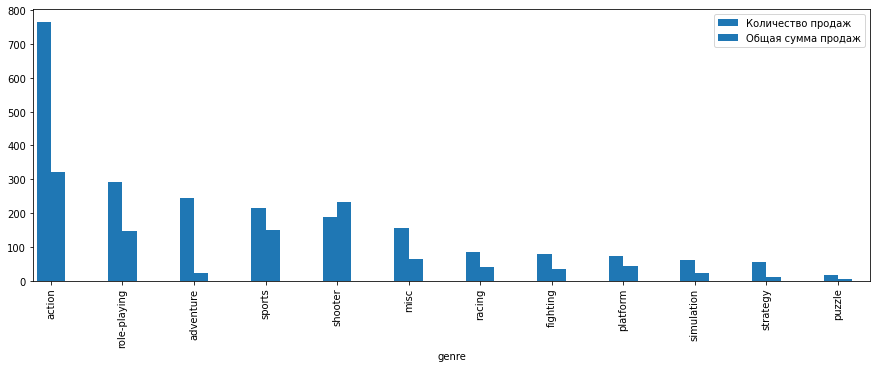

In [60]:
ax = plt.gca()
pivot = actual_data.groupby('genre').agg({'name': 'count', 'total_sales': 'sum'}).sort_values(by='name', ascending=False)
plot1 = pivot['name']
plot1.plot(kind='bar', figsize=(15,5), ax=ax, width=0.2, position=1)
plot2 = pivot['total_sales']
plot2.plot(kind='bar', figsize=(15,5), ax=ax, width=0.2, position=0)
ax.legend(['Количество продаж', 'Общая сумма продаж'])

In [61]:
def boxplot_genre_draw(title=None, query_condition = None, ylims=None):
    %matplotlib inline
    if query_condition == None:
        ax = actual_data.boxplot(column='total_sales', fontsize=25, figsize=(25,10))
    else:
        df_query = actual_data.query(query_condition)
        by_column = query_condition.split()[0]
        ax = df_query.boxplot(column='total_sales', by=by_column, fontsize=25, figsize=(25,10))
        ax.set_xlabel('')
        ax.set_title('')
    if ylims != None:
        ax.set_ylim(ylims)
    if title != None:
        plt.suptitle(title, y=0.94, fontsize=25, fontweight='bold')

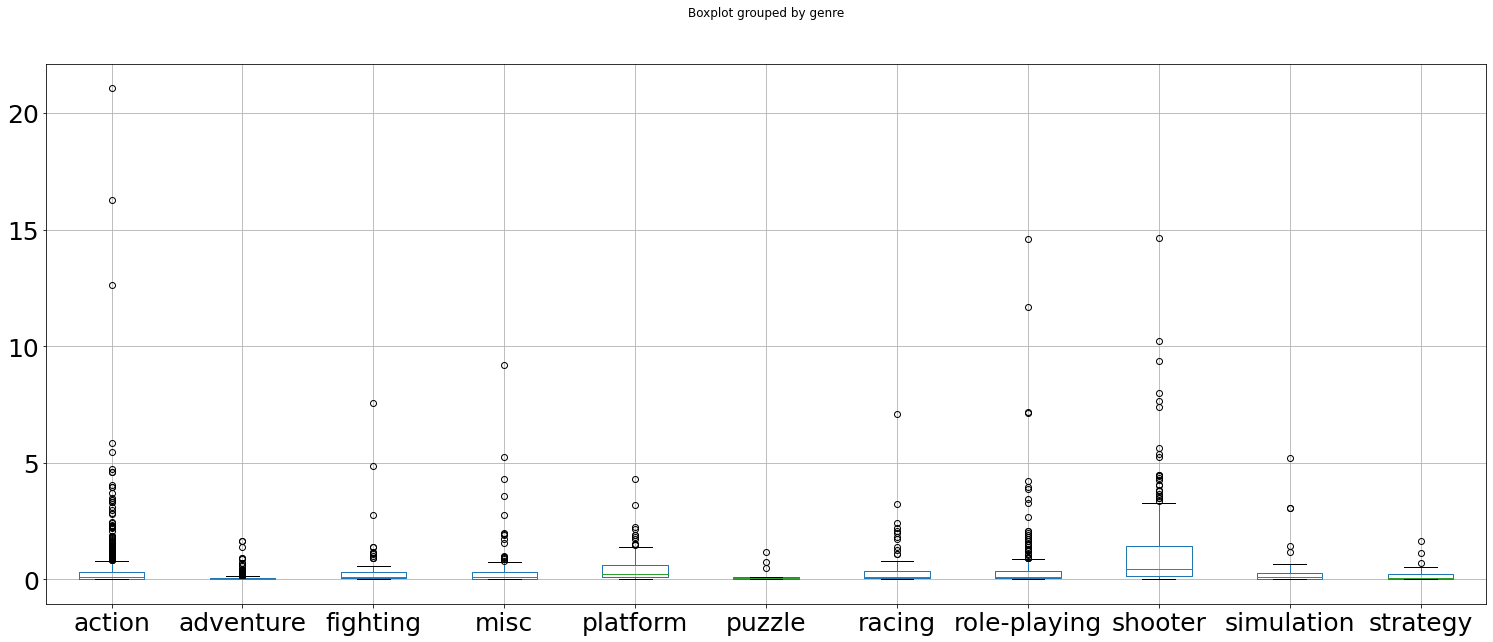

In [62]:
genres = ['action', 'role-playing', 'adventure', 'sprots', 'shooter', 'misc', 'racing', 'fighting', 'platform', 'simulation', 'strategy', 'puzzle']
boxplot_genre_draw(query_condition='genre in @genres')

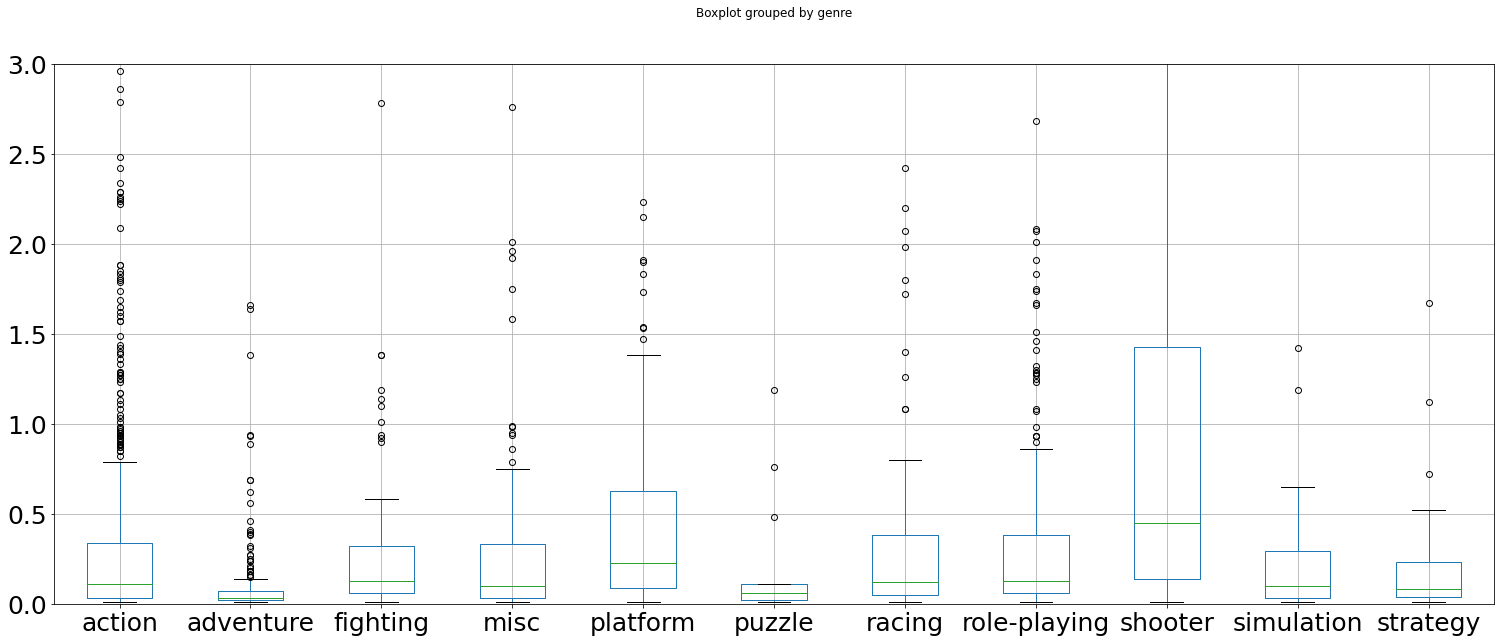

In [63]:
genres = ['action', 'role-playing', 'adventure', 'sprots', 'shooter', 'misc', 'racing', 'fighting', 'platform', 'simulation', 'strategy', 'puzzle']
boxplot_genre_draw(query_condition='genre in @genres', ylims=[0, 3])

**Общий вывод:** 
1) Количество игр, которые разрабатывались для консолей и ПК стали расти с 90-х годов. С момента выхода мобильных игр, количество платформенных стало уменьшаться.

2) Популярные платформы за период: ps2, x360, ps3, wii, ds, ps;

3) Средняя жизнь платформы составляет 8-10 лет. Пик приходится спустя 5 лет после выхода приставки;

4) Больше всего игр продано на ps и x360;

5) Продажи связаны с отзывами критиков и пользователей;

6) Самый популярный жанр за последние 10 лет - action.

Заполним пропуски для дальнейшего анализа.

In [65]:
actual_data['critic_score'] = actual_data['critic_score'].fillna(-1)

In [66]:
actual_data['user_score'] = actual_data['user_score'].fillna(-1)

In [67]:
actual_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,grand theft auto v,ps3,2013,action,7.02,9.09,0.98,3.96,97.0,8.2,m,21.05
23,grand theft auto v,x360,2013,action,9.66,5.14,0.06,1.41,97.0,8.1,m,16.27
31,call of duty: black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,rp,14.63
33,pokemon x/pokemon y,3ds,2013,role-playing,5.28,4.19,4.35,0.78,-1.0,-1.0,rp,14.60
42,grand theft auto v,ps4,2014,action,3.96,6.31,0.38,1.97,97.0,8.3,m,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,strawberry nauts,psv,2016,adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,rp,0.01
16707,aiyoku no eustia,psv,2014,misc,0.00,0.00,0.01,0.00,-1.0,-1.0,rp,0.01
16710,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.00,-1.0,-1.0,rp,0.01
16712,haitaka no psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,rp,0.01


### Составим портрет пользователя

In [68]:
rating_pivot_table = actual_data.pivot_table(index = 'platform', values = ['na_sales','jp_sales','eu_sales'], aggfunc = ['sum'])

In [69]:
rating_pivot_table.columns = ['na_sales','jp_sales','eu_sales']

In [70]:
top5_eu = rating_pivot_table.sort_values(by = 'eu_sales', ascending = False).index[:5]
top5_jp = rating_pivot_table.sort_values(by = 'jp_sales', ascending = False).index[:5]
top5_na = rating_pivot_table.sort_values(by = 'na_sales', ascending = False).index[:5]

In [71]:
list_of_top = [top5_eu,top5_jp,top5_na]
for count,top in enumerate(list_of_top):
    if count == 0: 
        print('Топ платформ для европейского региона:',*top, "\t")
    elif count == 1:
        print('Топ платформ для японского региона:',*top, "\t")
    elif count == 2:
        print('Топ платформ для североамериканского региона:',*top, "\t")
    print()
    for platform in top:
        data = rating_pivot_table.loc[platform,['na_sales','jp_sales','eu_sales']]
        if count == 0: 
            part = data['eu_sales']
        elif count == 1:
            part = data['jp_sales']
        elif count == 2:
            part = data['na_sales']
        ratio = part / sum(data)
        print('Платформа: ',platform, 'Доля продаж: ', ratio)
    print( )

Топ платформ для европейского региона: ps4 xone x360 ps3 3ds 	

Платформа:  ps4 Доля продаж:  0.40911998194062954
Платформа:  xone Доля продаж:  0.6419855222337125
Платформа:  x360 Доля продаж:  0.6549041623225601
Платформа:  ps3 Доля продаж:  0.4105780421569894
Платформа:  3ds Доля продаж:  0.27889318828940624

Топ платформ для японского региона: 3ds ps3 psv ps4 wiiu 	

Платформа:  3ds Доля продаж:  0.4950719135577135
Платформа:  ps3 Доля продаж:  0.15097633518686143
Платформа:  psv Доля продаж:  0.6252943155062242
Платформа:  ps4 Доля продаж:  0.06004740584672089
Платформа:  wiiu Доля продаж:  0.18151484818151464

Топ платформ для североамериканского региона: ps4 ps3 xone x360 3ds 	

Платформа:  ps4 Доля продаж:  0.5308326122126494
Платформа:  ps3 Доля продаж:  0.43844562265614906
Платформа:  xone Доля продаж:  0.355670458462599
Платформа:  x360 Доля продаж:  0.3410056941214211
Платформа:  3ds Доля продаж:  0.22603489815288028



В большинстве случаев лидирует европейский регион.

Теперь проверим лидирующий жанр.

In [72]:
top_genre_pivot_table = actual_data.pivot_table(index = ['genre'], values = ['na_sales','jp_sales','eu_sales'], aggfunc = ['sum'])

In [73]:
top_genre_pivot_table.columns = ['na_sales','jp_sales','eu_sales']
top5_genres_eu = top_genre_pivot_table.sort_values(by = 'eu_sales', ascending = False).index[:5]
top5_genres_jp = top_genre_pivot_table.sort_values(by = 'jp_sales', ascending = False).index[:5]
top5_genres_na = top_genre_pivot_table.sort_values(by = 'na_sales', ascending = False).index[:5]

In [74]:
print('Топ 5 жанров в европейском регионе:',*top5_genres_eu)
print('Топ 5 жанров в японском регионе:',*top5_genres_jp)
print('Топ 5 жанров в североамериканском регионе:',*top5_genres_na)

Топ 5 жанров в европейском регионе: action shooter sports role-playing misc
Топ 5 жанров в японском регионе: role-playing action misc fighting shooter
Топ 5 жанров в североамериканском регионе: action shooter sports role-playing racing


In [75]:
sales_pivot_table = actual_data.pivot_table(index = ['rating'], values = ['na_sales','jp_sales','eu_sales'], aggfunc = ['sum'])

In [76]:
sales_pivot_table

sum                  
       eu_sales jp_sales na_sales
rating                           
e         83.36    15.14    79.05
e10+      42.69     5.89    54.24
m        145.32    14.11   165.21
rp        78.91    85.05    89.42
t         41.95    20.59    49.79

Рейтинг *e* имеет самую высокую долю продаж в европейском регионе, а рейтинг *e10+* в североамериканском регионе.

### Проверка гипотез

**Средние пользовательские рейтинги платформ Xbox One и PC одинаковые**

Нулевая гипотеза всегда составляется исходя из равенства, следовательно, звучать она будет так: "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые". Альтернативная гипотеза: "Средние пользовательские рейтинги платформ Xbox One и PC разные".

In [77]:
actual_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,grand theft auto v,ps3,2013,action,7.02,9.09,0.98,3.96,97.0,8.2,m,21.05
23,grand theft auto v,x360,2013,action,9.66,5.14,0.06,1.41,97.0,8.1,m,16.27
31,call of duty: black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,rp,14.63
33,pokemon x/pokemon y,3ds,2013,role-playing,5.28,4.19,4.35,0.78,-1.0,-1.0,rp,14.60
42,grand theft auto v,ps4,2014,action,3.96,6.31,0.38,1.97,97.0,8.3,m,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,strawberry nauts,psv,2016,adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,rp,0.01
16707,aiyoku no eustia,psv,2014,misc,0.00,0.00,0.01,0.00,-1.0,-1.0,rp,0.01
16710,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.00,-1.0,-1.0,rp,0.01
16712,haitaka no psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,rp,0.01


In [79]:
actual_data['platform'].value_counts()

ps4     392
psv     358
ps3     345
3ds     303
xone    247
pc      189
x360    186
wiiu    115
psp      67
wii      23
ds        8
Name: platform, dtype: int64

In [80]:
alpha = .05

result_first = st.ttest_ind(actual_data[(actual_data['platform'] == 'xone') & (actual_data['user_score'] > 0)]['user_score'],
                            actual_data[(actual_data['platform'] == 'pc') & (actual_data['user_score'] > 0)]['user_score'])

print('p-value:', result_first.pvalue)


if (result_first.pvalue < alpha):
    print("Можем отвергнуть нулевую гипотезу")
else:
    print("Можем не отвергать нулевую гипотезу")

p-value: 0.14012658403611647
Можем не отвергать нулевую гипотезу


**Вывод:** средние пользовательские рейтинги платформ Xbox One и PC различаются.

**Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные**

Нулевая гипотеза всегда составляется исходя из равенства, следовательно, звучать она будет так: "Средние пользовательские рейтинги жанров Action и Sports одинаковые". Альтернативная гипотеза: "Средние пользовательские рейтинги жанров Action и Sports разные".

In [82]:
genre_action = actual_data[(actual_data['genre']=='action') & (actual_data['user_score'] > 0)]['user_score']
genre_sports = actual_data[(actual_data['genre']=='sports') & (actual_data['user_score'] > 0)]['user_score']
print(genre_action.mean())
print(genre_sports.mean())

6.837532133676092
5.238124999999999


In [83]:
alpha = .05

results = st.ttest_ind(genre_action,
                       genre_sports,
                       equal_var=False)

print('p-value:', results.pvalue)


if (results.pvalue < alpha):
    print("Можем отвергнуть нулевую гипотезу")
else:
    print("Можем не отвергать нулевую гипотезу")

p-value: 1.4460039700704315e-20
Можем отвергнуть нулевую гипотезу


**Вывод:** средние пользовательские рейтинги жанров Action и Sports одинаоквые, о чём нам и говорит окно предупреждения.

**Общий вывод по разделу:**
Были сформулированы две гипотезы:
1) Нулевая: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
   Альтернативная: Средние пользовательские рейтинги платформ Xbox One и PC разные.
   Тест показал, что нулевая гипотеза не подтвердилась, был выбран критерий Стьюдента - проверка равенств средних значений в      двух выборках.

2) Нулевая: Средние пользовательские рейтинги жанров Action и Sports одинаковые;
   Альтернативная: Средние пользовательские рейтинги жанров Action и Sports разные.
   Тест показал, что нулевая гипотеза не подтвердилась, был выбран критерий Стьюдента = проверка равенств средних значений в      двух выборках.

### Вывод

Исходя из проведённого анализа, мы пришли к выводу, что самые перспективные плтаформы: xone, wiiu, pc. Также можно сделать вывод, что оценка критиков играет большую роль в продажах, нежели оценка пользователей. Самые популярные жанры в европейском регионе: action, sports, misc, racing, shooter. Самые популярные жанры в японском регионе: action, adventure, role-playing, misc, fighting.
Самые популярные жанры в североамериканском регионе: action, sports, racing, misc, shooter.

Также мы выяснили, что самые популярные платформы в европейском регионе: ds, wii, x360, ps2, xb. Самые популярные платформы в японском регионе: psp, ds, ps2, psv, ps3. Самые популярные платформы в североамериканском регионе: ps2, ps, pc, x360, ps3.

Далее мы провели t-test'ы и выяснили, что рейтинг влияет на продажи и:
1) Средние пользовательские рейтинги платформ Xbox One и PC разные;  
2) Средние пользовательские рейтинги жанров Action и Sports разные.

Таким образом, можно сделать вывод, если игра выходит на Xbox One, PS4, PS4 PRO и PC в жанре action, то она имеет больше перспектив на успешную продажу.